# Create Graphics

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

BOOK_COUNT_CLEANED_DF = Path('./data/book_counts_cleaned.csv')

In [2]:
book_ranking = pd.read_csv(BOOK_COUNT_CLEANED_DF, index_col=0)

## Ranking by Posts and Comments

In [3]:
# Absolute ranking:
absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
absolute_rank = pd.DataFrame(absolute_rank[['Occurrences']].reset_index())
absolute_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_2608\130709116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Harry Potter,harrypotter,3151
1,1984,1984,2232
2,The Lord of the Rings,lordoftherings,1225
3,The Hunger Games,hungergames,1176
4,Bible,bible,1067
...,...,...,...
23482,Black holes and time warps,blackholesandtimewarps,1
23483,Black heather,blackheather,1
23484,Scar night,scarnight,1
23485,Scared Stiff,scaredstiff,1


In [4]:
def remove_synonyms(rank_df):
    synonyms = {('darktower', 'darktowers'), ( 'darktower', 'gunslinger'), ('50shadesofgrey', 'fiftyshadesofgrey')}

    for syn1, syn2 in synonyms:
        count1 = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][2]
        count2 = rank_df.loc[rank_df['Normalized Title'] == syn2].values[0][2]
        title = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][0]
        new_col = pd.DataFrame([[title, syn1, count1+count2]], columns=['Title', 'Normalized Title', 'Occurrences'])

        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn1].index)
        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn2].index)

        rank_df = pd.concat([rank_df, new_col])

        rank_df.sort_values('Occurrences', ascending=False)

        rank_df = rank_df.sort_values('Occurrences', ascending=False)
        rank_df = rank_df.reset_index(drop=True)
    return rank_df[:100]

In [5]:
def plot_ranking(ranking, title, y_axis="Occurrences in Posts and Comments"):
    plt.rcParams["figure.dpi"] = 200
    plt.rcParams["figure.figsize"] = (5,5)

    p = ranking.sort_values(by='Occurrences').plot(kind='barh', x='Title', zorder=2)
    plt.suptitle(title, x=0.33, y=0.93, weight='bold')
    p.set_xlim(0, (absolute_rank["Occurrences"][0] // 100) * 100 + 250)
    p.set_xlabel(y_axis, labelpad=10, size=8, fontstyle='italic')
    p.set_ylabel(None)

    vals = p.get_xticks()
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    for tick in vals:
        p.axvline(x=tick, alpha=1, color='#eeeeee', zorder=1)

    p.tick_params(axis='y', which='both', bottom=False, top=False, left=False, labelbottom=False)

    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    p.spines['left'].set_visible(False)
    p.spines['bottom'].set_visible(False)
    p.get_legend().remove()

In [6]:
post_and_comments_ranked = remove_synonyms(absolute_rank)
post_and_comments_ranked.to_csv('./data/Top-100.csv')
post_and_comments_ranked

,Title,Normalized Title,Occurrences
0,Harry Potter,harrypotter,3151
1,1984,1984,2232
2,The dark tower,darktower,1395
3,The Lord of the Rings,lordoftherings,1225
4,The Hunger Games,hungergames,1176
...,...,...,...
95,Snow Crash,snowcrash,222
96,And Then There Were None,andthentherewerenone,221
97,Wind-Up Bird Chronicle,windupbirdchronicle,218
98,Do Androids Dream of Electric Sheep?,doandroidsdreamofelectricsheep,217


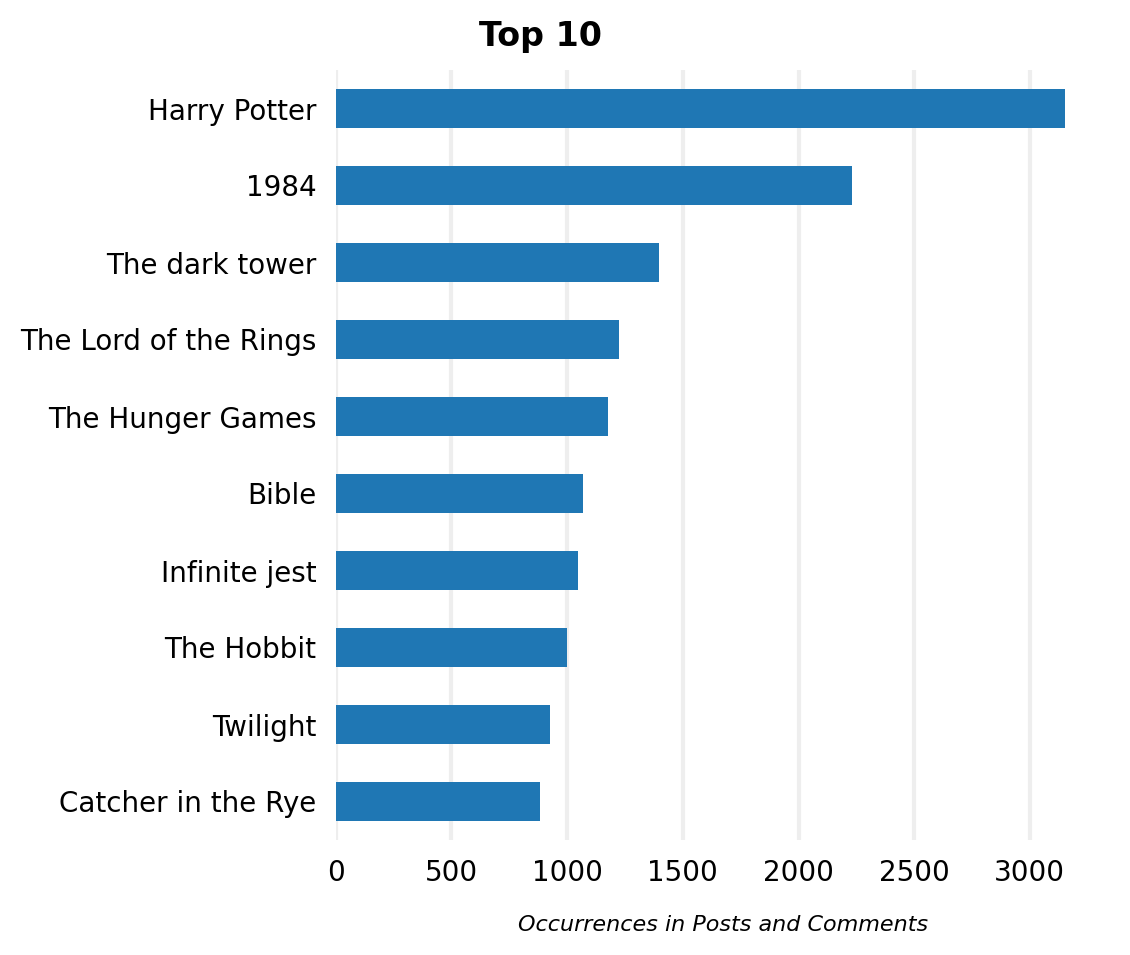

In [7]:
plot_ranking(post_and_comments_ranked[:10], 'Top 10')
plt.savefig('./Graphics/Top-10.png', bbox_inches='tight')

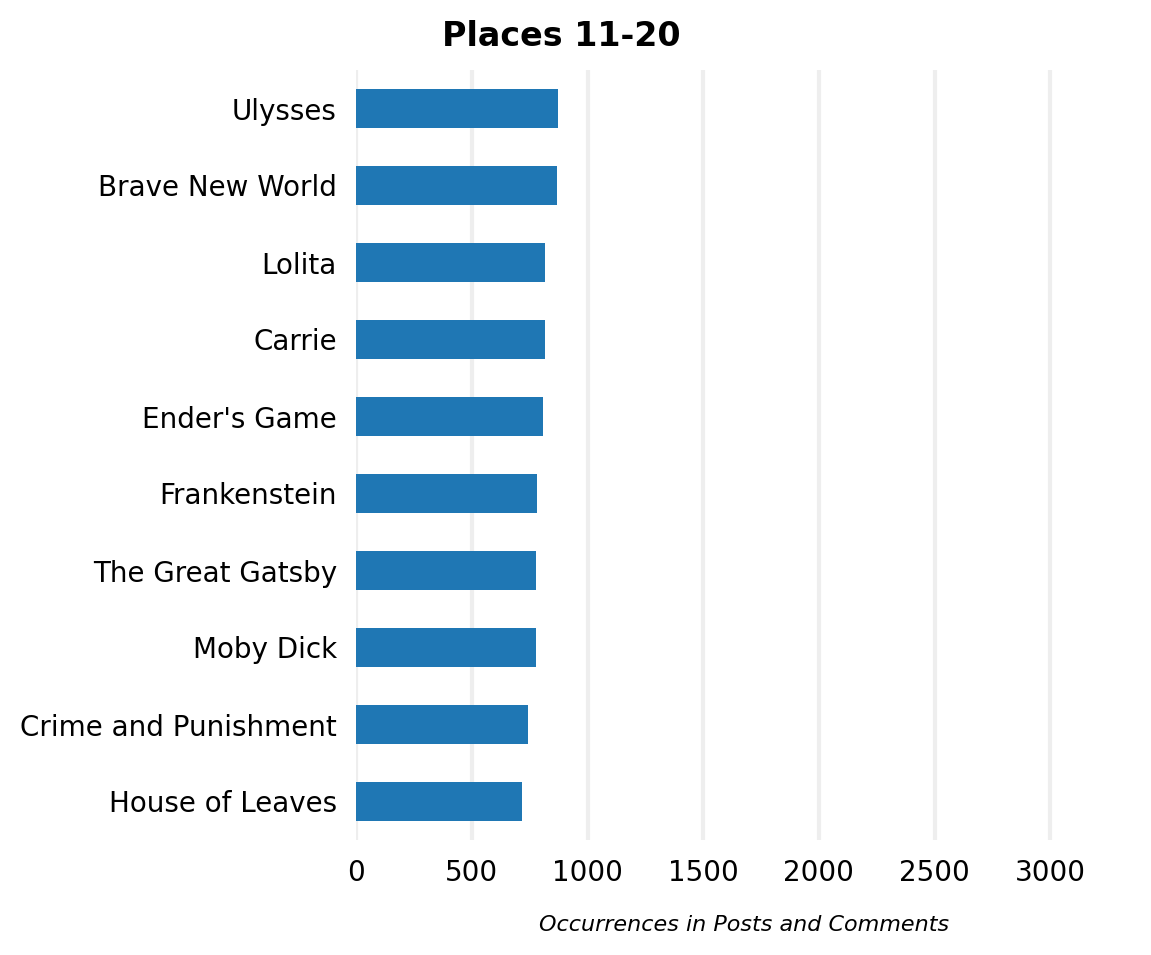

In [8]:
plot_ranking(post_and_comments_ranked[10:20], 'Places 11-20')
plt.savefig('./Graphics/Top11-20.png', bbox_inches='tight')

## Rank by Post Texts

In [9]:
post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
post_rank = pd.DataFrame(post_rank[['Occurrences']].reset_index())
post_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_2608\3565420198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Harry Potter,harrypotter,2943
1,1984,1984,2080
2,The Hunger Games,hungergames,1136
3,The Lord of the Rings,lordoftherings,1134
4,Infinite jest,infinitejest,1028
...,...,...,...
23482,The Matchmaking Pact,matchmakingpact,1
23483,Cinnamon toast and the end of the world,cinnamontoastandtheendoftheworld,1
23484,The Masters of Deception,mastersofdeception,1
23485,Cinema Sewer,cinemasewer,1


In [10]:
post_rank = remove_synonyms(post_rank)

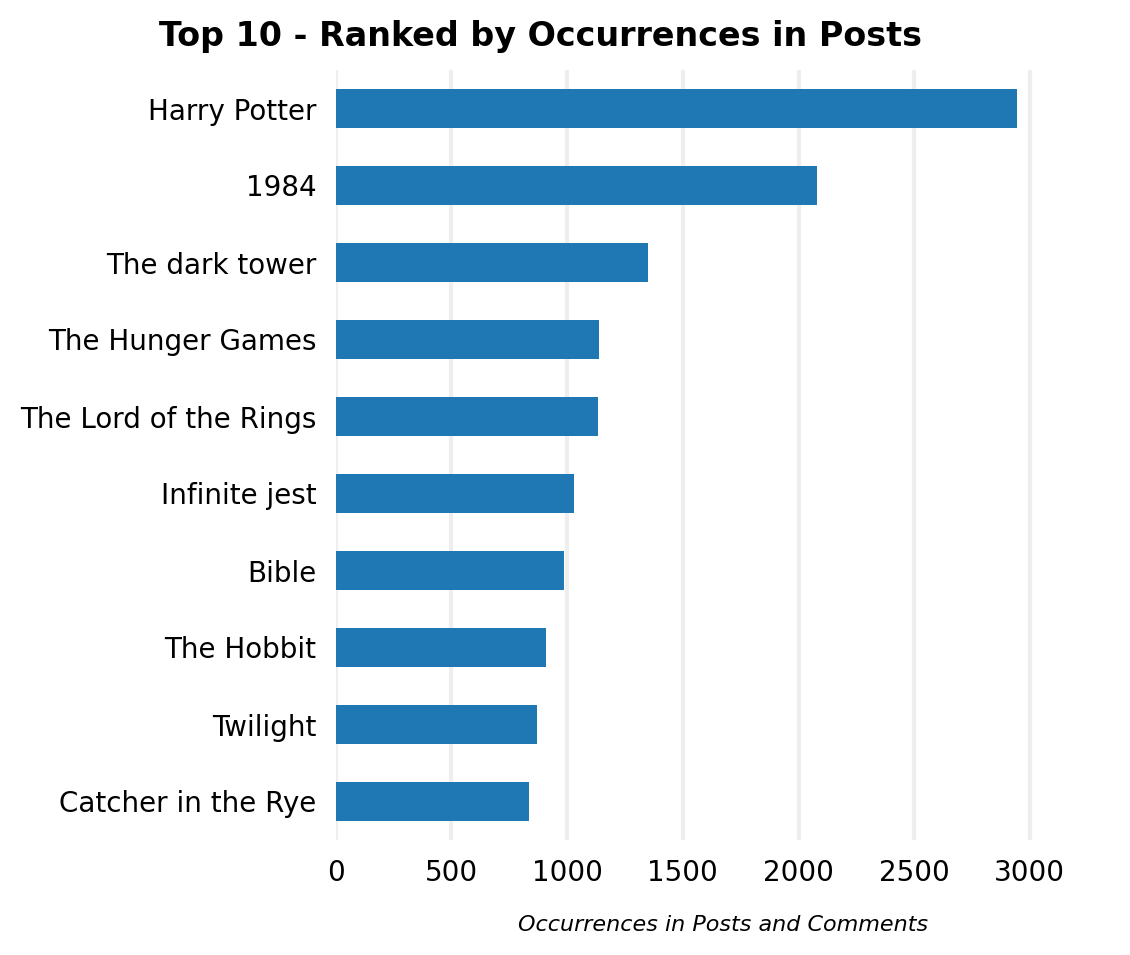

In [11]:
plot_ranking(post_rank[:10], 'Top 10 - Ranked by Occurrences in Posts')

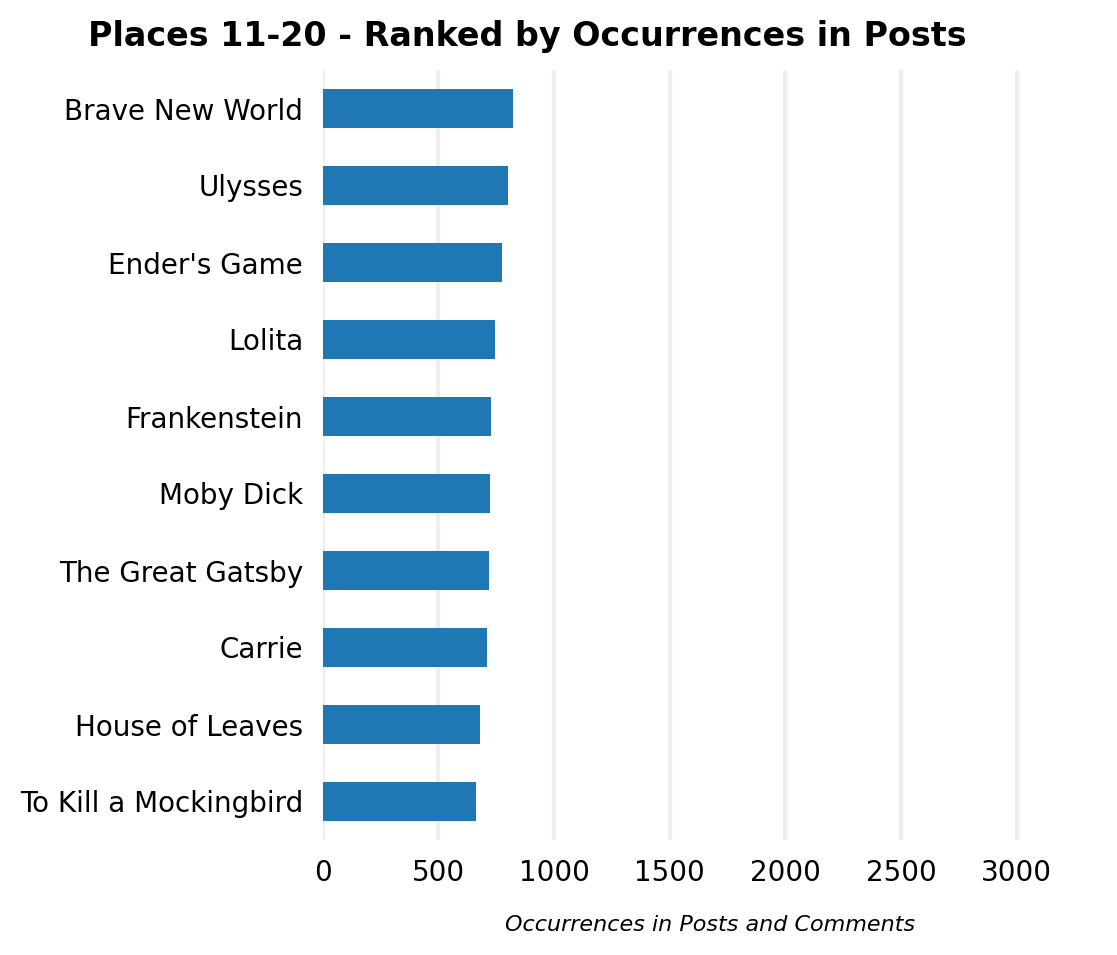

In [12]:
plot_ranking(post_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Posts')

## Rank by Comments Texts

In [13]:
comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
comment_rank = pd.DataFrame(comment_rank[['Occurrences']].reset_index())
comment_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_2608\1945169134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Harry Potter,harrypotter,208
1,1984,1984,152
2,Carrie,carrie,108
3,The Hobbit,hobbit,92
4,The Lord of the Rings,lordoftherings,91
...,...,...,...
7749,Starcrossed,starcrossed,1
7750,Stardust,stardust,1
7751,Starfarers,starfarers,1
7752,Starfish,starfish,1


In [14]:
comment_rank = remove_synonyms(comment_rank)

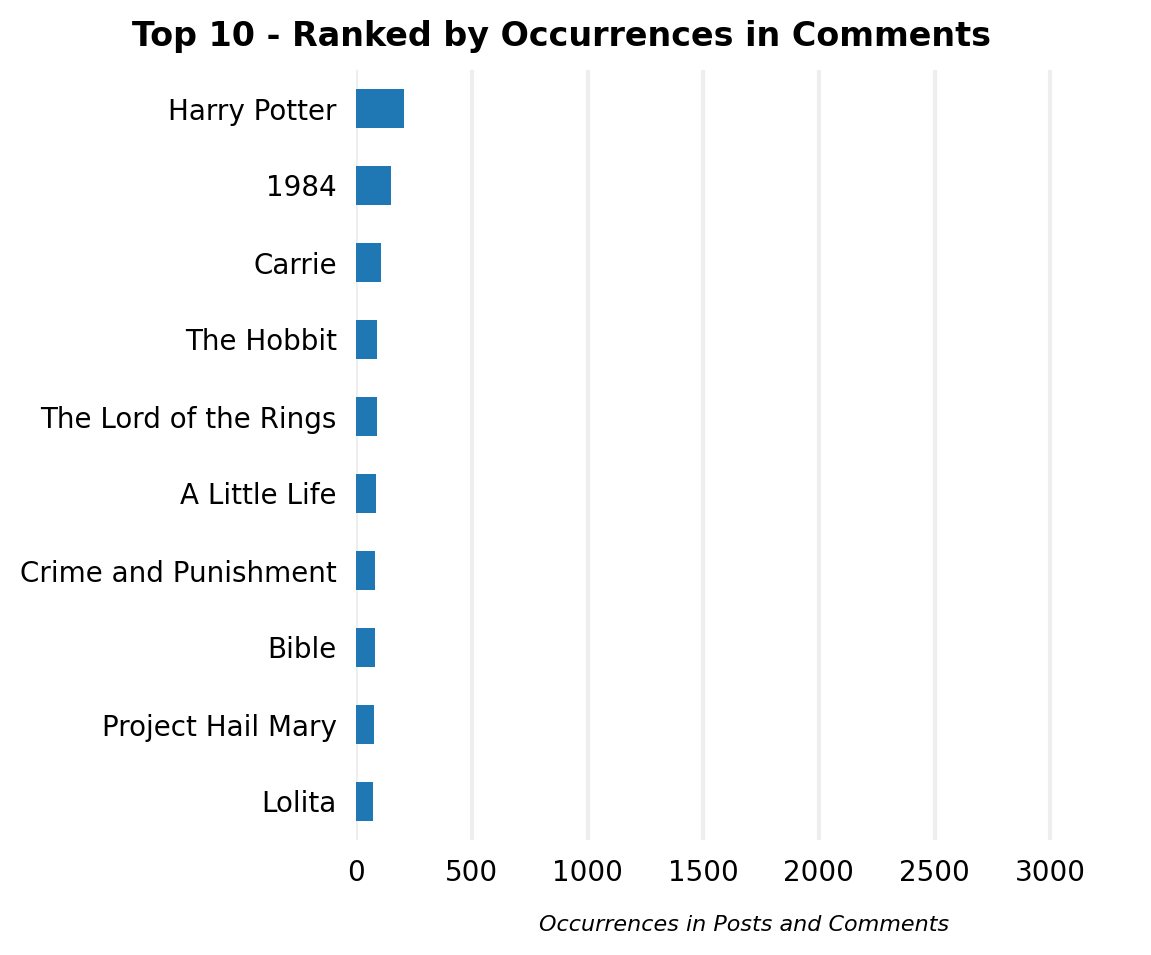

In [15]:
plot_ranking(comment_rank[:10], 'Top 10 - Ranked by Occurrences in Comments')

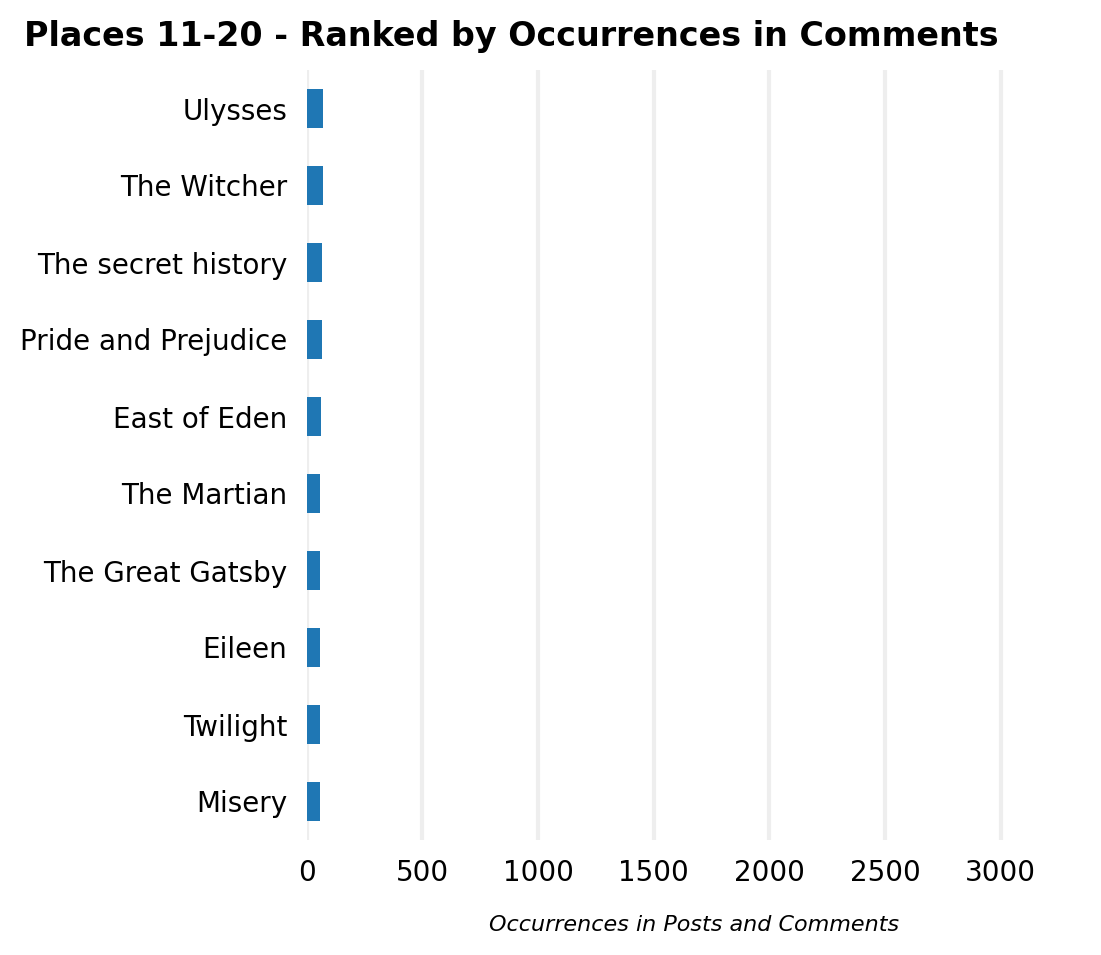

In [16]:
plot_ranking(comment_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Comments')

## Top 100


In [17]:
post_and_comments_ranked.index += 1
top_100 = post_and_comments_ranked[:100][['Title', 'Occurrences']]
top_100

,Title,Occurrences
1,Harry Potter,3151
2,1984,2232
3,The dark tower,1395
4,The Lord of the Rings,1225
5,The Hunger Games,1176
...,...,...
96,Snow Crash,222
97,And Then There Were None,221
98,Wind-Up Bird Chronicle,218
99,Do Androids Dream of Electric Sheep?,217


In [18]:
# Create Markdown Table
print(top_100.to_markdown())

|     | Title                                |   Occurrences |
|----:|:-------------------------------------|--------------:|
|   1 | Harry Potter                         |          3151 |
|   2 | 1984                                 |          2232 |
|   3 | The dark tower                       |          1395 |
|   4 | The Lord of the Rings                |          1225 |
|   5 | The Hunger Games                     |          1176 |
|   6 | Bible                                |          1067 |
|   7 | Infinite jest                        |          1045 |
|   8 | The Hobbit                           |           999 |
|   9 | Twilight                             |           925 |
|  10 | Catcher in the Rye                   |           882 |
|  11 | Ulysses                              |           872 |
|  12 | Brave New World                      |           866 |
|  13 | Carrie                               |           817 |
|  14 | Lolita                               |         

In [19]:
import re

readme = Path('README.md')
new_readme_str = re.sub(r'(?s)(?<=/summary>).*(?=</details>)', f'\n\n{top_100.to_markdown()}\n\n', readme.read_text(encoding='utf-8'))

readme.write_text(new_readme_str, encoding='utf-8')

8275